In [1]:
library(Seurat)
library(ggplot2)
library(data.table)

Attaching SeuratObject



In [25]:
#### Load counts and annotations for Batch #1, COH096 ####------------------
COH096.counts <- fread("./COH096_txt", header=T)
COH096.annot <- read.delim("./COH096_metadata.txt", header=T, fill=T)

In [3]:
dim(COH096.counts)
dim(COH096.annot)

[1] 32738 68848

[1] 68845    11

In [4]:
rownames(COH096.counts)[1:10]
colnames(COH096.counts)[1:10]

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

[1] "Gene"                    "Gene ID"                
 [3] "Gene Symbol"             "AB-24A_AAACCCACAATGCTCA"
 [5] "AB-24A_AAACCCACACCACTGG" "AB-24A_AAACCCAGTCCTGGGT"
 [7] "AB-24A_AAACCCATCAGTGTCA" "AB-24A_AAACCCATCGAGTTGT"
 [9] "AB-24A_AAACGAAAGTCGCTAT" "AB-24A_AAACGAATCCGGACGT"

In [26]:
gids <- COH096.counts$`Gene Symbol`
x <- which(gids != "")
dup <- which(duplicated(gids[x]))
x <- x[-dup]

COH096.counts <- COH096.counts[x, 4:ncol(COH096.counts)]
COH096.counts <- as.matrix(COH096.counts)
rownames(COH096.counts) <- gids[x]

In [27]:
rownames(COH096.annot)<- COH096.annot$Cell

In [28]:
#### Create Seurat object ####
COH096.seurat <- CreateSeuratObject(COH096.counts, min.cells = 3, min.features = 50, meta.data = COH096.annot)

Warning message:
“The following arguments are not used: row.names”


In [8]:
rm(COH096.counts)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2810005,150.1,4366437,233.2,4366437,233.2
Vcells,362573544,2766.3,2477641188,18903.0,3061347592,23356.3


In [29]:
dim(COH096.seurat) 
mean(COH096.seurat$Percent.Mitochondria) 
median(COH096.seurat$Percent.Mitochondria)

[1] 20119 68845

[1] 16.56842

[1] 9.1

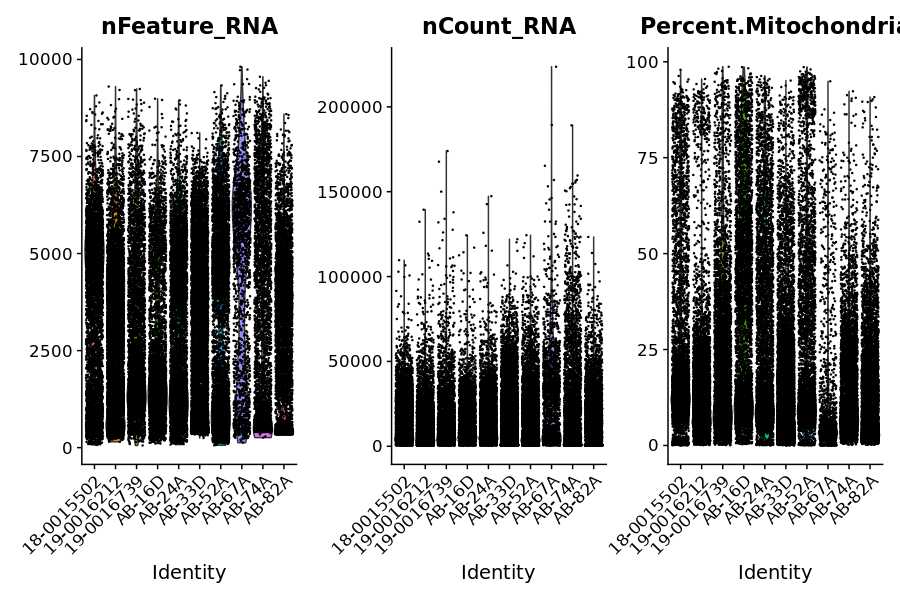

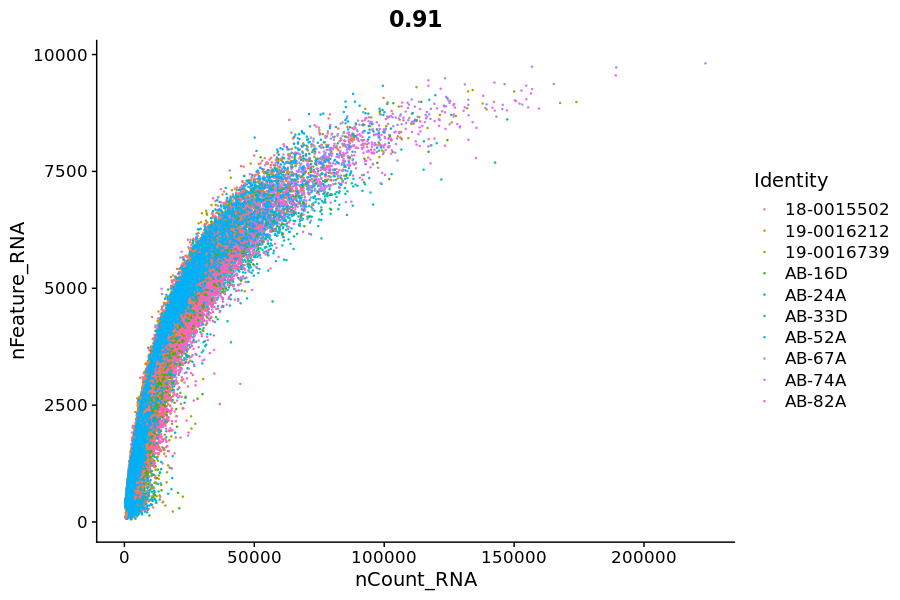

In [10]:
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 100)
#### QC Plots before filtering ####
VlnPlot(COH096.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH096.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)

In [12]:
#### Export plots pre-filtering ####
pdf("./Figures/COH096.Seurat.PreQC.pdf", width=16, height=12)
VlnPlot(COH096.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH096.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)
par(mar=c(6,8,3,2))
barplot(table(COH096.seurat$Sample), horiz = T, las=2)
dev.off()

png 
  2

In [39]:
#### Filter ####
COH096.seurat <- subset(x=COH096.seurat, 
                       nCount_RNA > 1000 & 
                       nCount_RNA < 80000 & 
                       nFeature_RNA > 500 &
                       Percent.Mitochondria < 50)

In [40]:
dim(COH096.seurat)

[1] 20119 37839

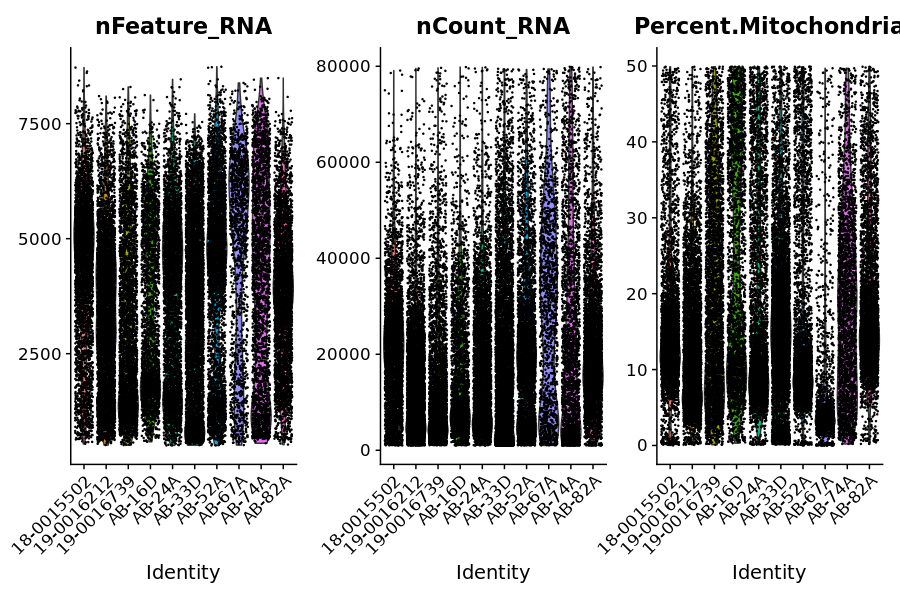

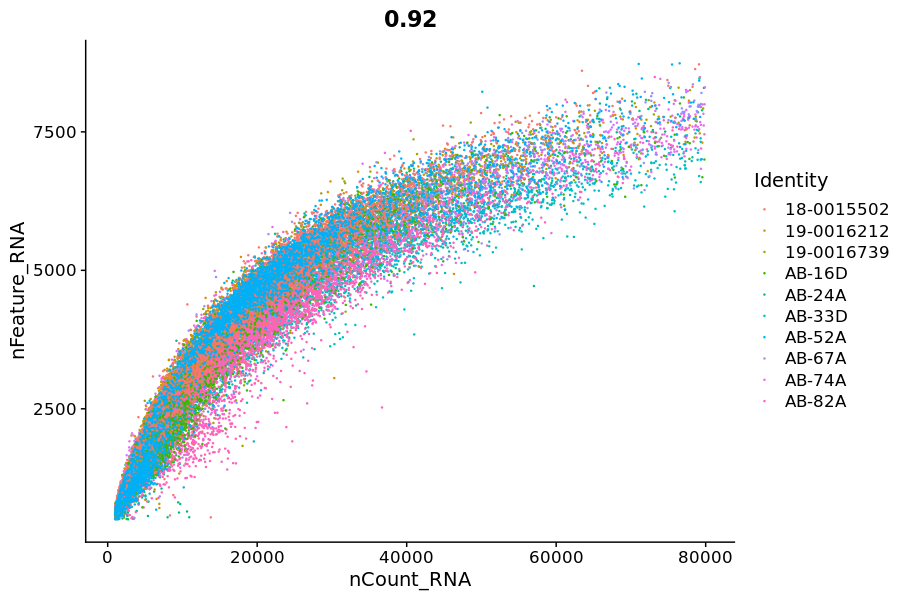

In [41]:
#### QC Plots after filtering ####
VlnPlot(COH096.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH096.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)

In [42]:
pdf("./Figures/COH096.Seurat.AfterQC.pdf", width=16, height=12)
VlnPlot(COH096.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH096.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)
par(mar=c(6,8,3,2))
barplot(table(COH096.seurat$Sample), horiz = T, las=2)
dev.off()

png 
  2

In [38]:
#saveRDS(COH096.seurat, file="COH096.seurat")

In [43]:
library(qs)

qs v0.25.1.



In [45]:
qsave(COH096.seurat, "COH096.seurat_v2.qs", nthreads=16)